<a href="https://colab.research.google.com/github/sipocz/I4_0/blob/main/SolventRecovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

In [38]:
!wget "https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py"
!rm grafikon.py.*
from grafikon import grafikon

--2024-02-13 20:46:25--  https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2539 (2.5K) [text/plain]
Saving to: ‘grafikon.py.1’

grafikon.py.1       100%[===================>]   2.48K  --.-KB/s    in 0s      

2024-02-13 20:46:26 (30.7 MB/s) - ‘grafikon.py.1’ saved [2539/2539]



In [125]:
drive.mount('/content/drive', readonly=False,force_remount=True )

Mounted at /content/drive


In [40]:
path="/content/drive/MyDrive/000_OLD_UZ"

In [121]:
fname_list=["AQ_T120F.xlsx","AQ_T230F.xlsx","AQ_T340F.xlsx","AQ_T460F.xlsx"]

In [120]:
def get_file(fname_in):
    fname=path+"/"+fname_in
    df=pd.read_excel(fname)
    df.columns=["time",fname_in.split(".")[0],"status"]
    df["time"]=pd.to_datetime(df["time"], format="%Y-%m-%d %H:%M:%S")
    del(df["status"])
    df.set_index("time",inplace=True)
    print(df.head())
    df=df.resample("1Min").mean()
    return(df)


In [122]:
dfx=get_file("AQ_T020F.xlsx")
for fname in fname_list:
    df=get_file(fname)

    dfx=pd.concat([dfx,df],axis=1)

                      AQ_T020F
time                          
2023-01-02 06:16:03  23.812309
2023-01-02 06:16:22  23.776608
2023-01-02 06:16:42  23.741884
2023-01-02 06:17:02  23.766966
2023-01-02 06:17:21  23.764206
                     AQ_T120F
time                         
2023-01-02 06:16:22  5.058738
2023-01-02 06:16:42  4.741496
2023-01-02 06:17:02  4.396904
2023-01-02 06:17:21  4.137731
2023-01-02 06:17:41  3.889592
                      AQ_T230F
time                          
2023-01-02 06:15:43  23.494089
2023-01-02 06:16:03  23.568544
2023-01-02 06:16:22  23.569788
2023-01-02 06:16:42  23.572334
2023-01-02 06:17:02  23.566034
                      AQ_T340F
time                          
2023-01-02 06:16:03  29.336996
2023-01-02 06:16:22  29.332916
2023-01-02 06:16:42  29.330149
2023-01-02 06:17:02  29.336996
2023-01-02 06:17:21  29.292639
                      AQ_T460F
time                          
2023-01-02 06:16:03  28.157536
2023-01-02 06:16:22  28.113993
2023-01-02 06:1

In [128]:
dfx.head()

,AQ_T020F,AQ_T120F,AQ_T230F,AQ_T340F,AQ_T460F
time,,,,,
2023-01-02 06:16:00,23.776934,4.900117,23.570222,29.333354,28.130545
2023-01-02 06:17:00,23.754014,4.141409,23.606270,29.322210,28.063407
2023-01-02 06:18:00,23.749197,3.234768,23.618385,29.324866,28.106786
2023-01-02 06:19:00,23.682667,2.210577,23.571005,29.316676,28.063775
2023-01-02 06:20:00,23.739033,23.843294,23.623784,29.285329,28.111876


In [127]:
dfx.dropna(inplace=True)

In [129]:
dfx.to_csv(path+"/"+"Felso.csv")

In [116]:
df2=df.copy(deep=True)

In [117]:
df2.columns=["asd"]

In [118]:
dfx=pd.concat([df,df2],axis=1)

In [119]:
dfx.head()

,AQ_T460F,asd
time,,
2023-01-02 06:16:00,28.130545,28.130545
2023-01-02 06:17:00,28.063407,28.063407
2023-01-02 06:18:00,28.106786,28.106786
2023-01-02 06:19:00,28.063775,28.063775
2023-01-02 06:20:00,28.111876,28.111876


In [89]:
df.resample("1Min").mean()

,AQ_T460F
time,
2023-01-02 06:16:00,28.130545
2023-01-02 06:17:00,28.063407
2023-01-02 06:18:00,28.106786
2023-01-02 06:19:00,28.063775
2023-01-02 06:20:00,28.111876
...,...
2023-06-30 23:55:00,28.907300
2023-06-30 23:56:00,28.863592
2023-06-30 23:57:00,28.885372


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

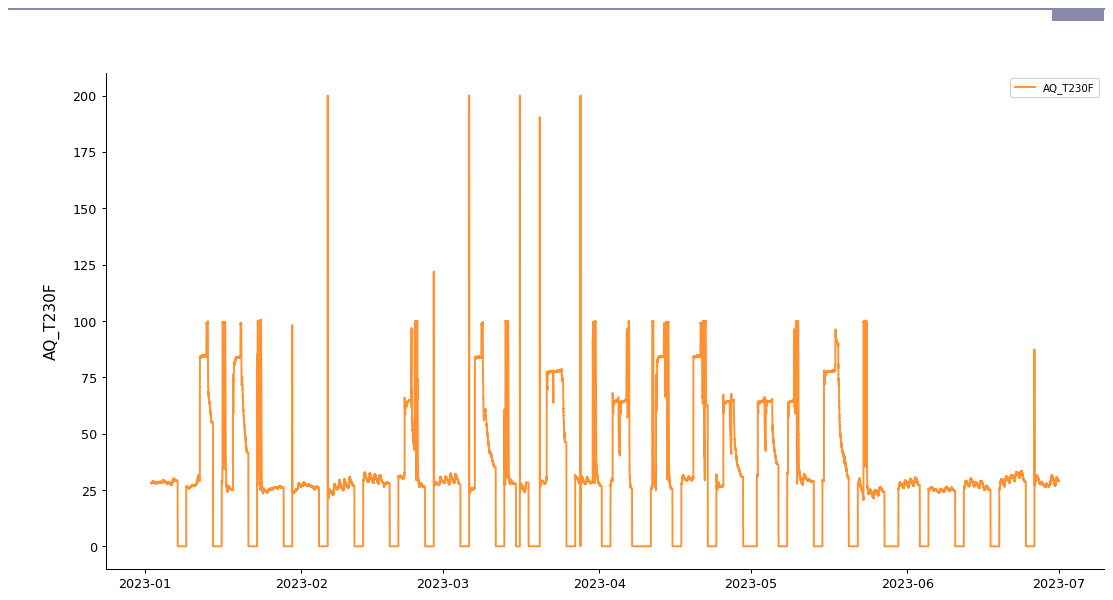

In [90]:
grafikon(df,"AQ_T460F","AQ_T230F")